# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
#CSV Import 
city_data_df = pd.read_csv( "cities.csv")

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 642


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2ef139cf1403e5a93f7d70f40a33387


In [5]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        

        # Append the City information into city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})


    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mersing
City not found. Skipping...
Processing Record 2 of Set 1 | yenagoa
City not found. Skipping...
Processing Record 3 of Set 1 | port alfred
City not found. Skipping...
Processing Record 4 of Set 1 | alta floresta
City not found. Skipping...
Processing Record 5 of Set 1 | dzhusaly
City not found. Skipping...
Processing Record 6 of Set 1 | barrow
City not found. Skipping...
Processing Record 7 of Set 1 | rikitea
City not found. Skipping...
Processing Record 8 of Set 1 | busselton
City not found. Skipping...
Processing Record 9 of Set 1 | namibe
City not found. Skipping...
Processing Record 10 of Set 1 | vila velha
City not found. Skipping...
Processing Record 11 of Set 1 | tome-acu
City not found. Skipping...
Processing Record 12 of Set 1 | bolungarvik
City not found. Skipping...
Processing Record 13 of Set 1 | bredasdorp
City not found. Skipping...
Processing Record 14 of Set 1 | ixtapa
City

City not found. Skipping...
Processing Record 18 of Set 3 | pochutla
City not found. Skipping...
Processing Record 19 of Set 3 | altoona
City not found. Skipping...
Processing Record 20 of Set 3 | ukiah
City not found. Skipping...
Processing Record 21 of Set 3 | kungurtug
City not found. Skipping...
Processing Record 22 of Set 3 | taolanaro
City not found. Skipping...
Processing Record 23 of Set 3 | chokurdakh
City not found. Skipping...
Processing Record 24 of Set 3 | taoudenni
City not found. Skipping...
Processing Record 25 of Set 3 | elizabeth city
City not found. Skipping...
Processing Record 26 of Set 3 | salo
City not found. Skipping...
Processing Record 27 of Set 3 | ende
City not found. Skipping...
Processing Record 28 of Set 3 | saint-philippe
City not found. Skipping...
Processing Record 29 of Set 3 | puerto ayora
City not found. Skipping...
Processing Record 30 of Set 3 | west plains
City not found. Skipping...
Processing Record 31 of Set 3 | maceio
City not found. Skipping

City not found. Skipping...
Processing Record 38 of Set 5 | siocon
City not found. Skipping...
Processing Record 39 of Set 5 | cascais
City not found. Skipping...
Processing Record 40 of Set 5 | clarence town
City not found. Skipping...
Processing Record 41 of Set 5 | khasan
City not found. Skipping...
Processing Record 42 of Set 5 | wanxian
City not found. Skipping...
Processing Record 43 of Set 5 | mingshui
City not found. Skipping...
Processing Record 44 of Set 5 | panaba
City not found. Skipping...
Processing Record 45 of Set 5 | esperance
City not found. Skipping...
Processing Record 46 of Set 5 | te anau
City not found. Skipping...
Processing Record 47 of Set 5 | nova olimpia
City not found. Skipping...
Processing Record 48 of Set 5 | tasiilaq
City not found. Skipping...
Processing Record 49 of Set 5 | pasni
City not found. Skipping...
Processing Record 0 of Set 6 | jhang
City not found. Skipping...
Processing Record 1 of Set 6 | altay
City not found. Skipping...
Processing Recor

City not found. Skipping...
Processing Record 7 of Set 8 | aksarka
City not found. Skipping...
Processing Record 8 of Set 8 | taltal
City not found. Skipping...
Processing Record 9 of Set 8 | veraval
City not found. Skipping...
Processing Record 10 of Set 8 | sao filipe
City not found. Skipping...
Processing Record 11 of Set 8 | kapit
City not found. Skipping...
Processing Record 12 of Set 8 | kwinana
City not found. Skipping...
Processing Record 13 of Set 8 | paldiski
City not found. Skipping...
Processing Record 14 of Set 8 | omsukchan
City not found. Skipping...
Processing Record 15 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 16 of Set 8 | dikson
City not found. Skipping...
Processing Record 17 of Set 8 | ostrovnoy
City not found. Skipping...
Processing Record 18 of Set 8 | cagayan de tawi-tawi
City not found. Skipping...
Processing Record 19 of Set 8 | kavaratti
City not found. Skipping...
Processing Record 20 of Set 8 | ahuimanu
City not found. Skipping.

City not found. Skipping...
Processing Record 25 of Set 10 | okhotsk
City not found. Skipping...
Processing Record 26 of Set 10 | loandjili
City not found. Skipping...
Processing Record 27 of Set 10 | lang son
City not found. Skipping...
Processing Record 28 of Set 10 | lata
City not found. Skipping...
Processing Record 29 of Set 10 | jiwani
City not found. Skipping...
Processing Record 30 of Set 10 | oksfjord
City not found. Skipping...
Processing Record 31 of Set 10 | coos bay
City not found. Skipping...
Processing Record 32 of Set 10 | toliary
City not found. Skipping...
Processing Record 33 of Set 10 | shillong
City not found. Skipping...
Processing Record 34 of Set 10 | gorin
City not found. Skipping...
Processing Record 35 of Set 10 | jibuti
City not found. Skipping...
Processing Record 36 of Set 10 | katherine
City not found. Skipping...
Processing Record 37 of Set 10 | waipawa
City not found. Skipping...
Processing Record 38 of Set 10 | talavera de la reina
City not found. Skip

City not found. Skipping...
Processing Record 42 of Set 12 | ashland
City not found. Skipping...
Processing Record 43 of Set 12 | caravelas
City not found. Skipping...
Processing Record 44 of Set 12 | stonewall
City not found. Skipping...
Processing Record 45 of Set 12 | graaff-reinet
City not found. Skipping...
Processing Record 46 of Set 12 | myitkyina
City not found. Skipping...
Processing Record 47 of Set 12 | monte alegre
City not found. Skipping...
Processing Record 48 of Set 12 | kamina
City not found. Skipping...
Processing Record 49 of Set 12 | presidente medici
City not found. Skipping...
Processing Record 0 of Set 13 | matagami
City not found. Skipping...
Processing Record 1 of Set 13 | dodola
City not found. Skipping...
Processing Record 2 of Set 13 | rungata
City not found. Skipping...
Processing Record 3 of Set 13 | huamuxtitlan
City not found. Skipping...
Processing Record 4 of Set 13 | road town
City not found. Skipping...
Processing Record 5 of Set 13 | tual
City not f

In [6]:
# Convert the cities weather data into a Pandas DataFrame & Show Record Count 

city_data_df = pd.read_csv("../Weather/cities.csv")

city_data_df.count()

City_ID       577
City_ID.1     577
City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       574
Date          577
dtype: int64

In [7]:
#display data 
cities_data_df=pd.read_csv("../Weather/cities.csv")

city_data_df.head()

,City_ID,City_ID.1,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


In [8]:
#export data to csv 
city_data_df.to_csv("../Weather/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../Weather/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City_ID.2,City_ID.1,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,,
0,0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

/var/folders/6l/3cm6cmdd77gbp_g_t75q5mww0000gn/T/ipykernel_82915/2543053066.py:8: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid (b=True,which="major",axis="both",linestyle="-",color="black")


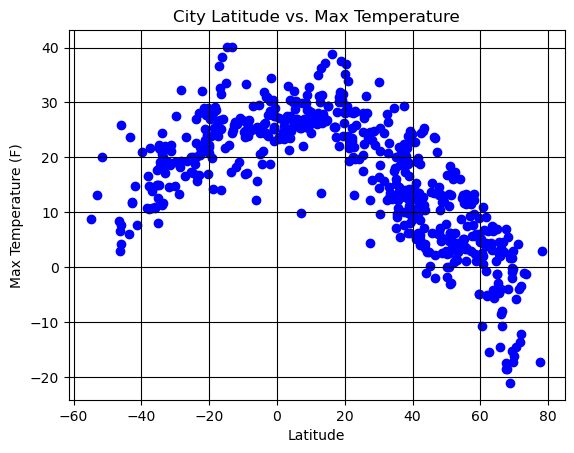

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],facecolors="blue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="black")

# Save the figure
plt.savefig('../output/fig1.png')

# Show plot
plt.show()

#### Latitude Vs. Humidity

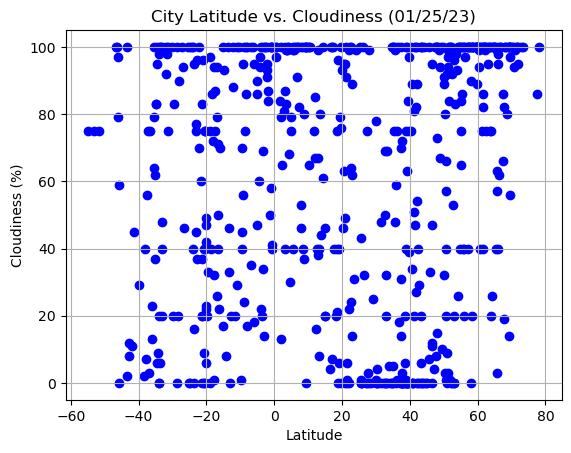

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],facecolors="blue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
# Save the figure
plt.savefig('../output/Fig3.png')

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

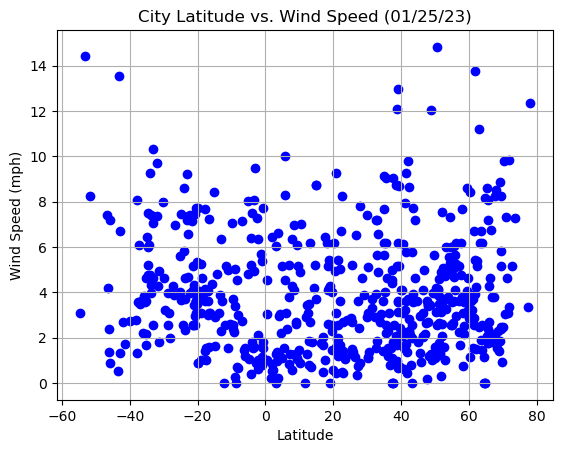

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],facecolors="blue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig('../output/Fig4.png')

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [26]:
# Define a function to create Linear Regression plots
def linear_regression_plots(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regression_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
    
    plt.scatter(x_values, y_values, marker="o")
    plt.plot(x_values, regression_values, "r-")
    
    
    print(f"The r-value is : {rvalue ** 2}")
    return line_eq

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City_ID.2,City_ID.1,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,,
0,0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,6,6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City_ID.2,City_ID.1,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,,
0,0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,6,6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City_ID.2,City_ID.1,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,,
2,2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,5,5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,7,7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,9,9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,10,10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8462548186825359


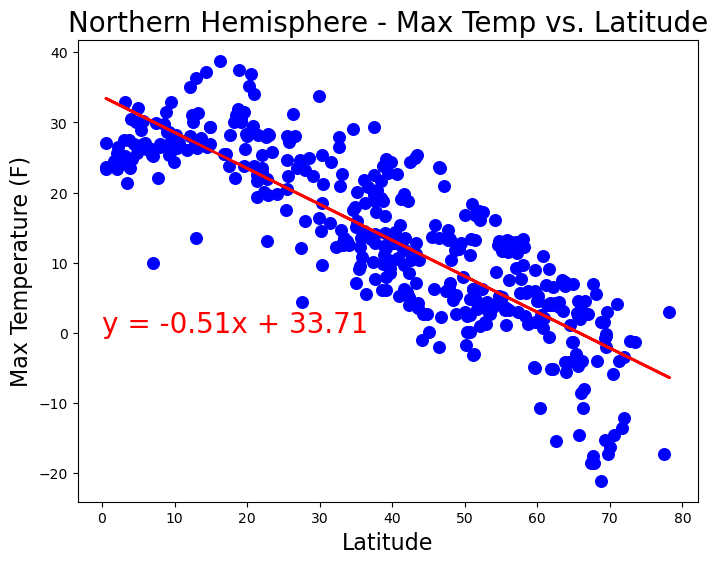

<Figure size 640x480 with 0 Axes>

In [18]:
# Linear regression on Northern Hemisphere
plt.figure(figsize=(8,6))
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values,y_values, marker='o', color='blue', s=[70])
plt.plot(x_values,regress_values, 'red', linewidth=2)

plt.title('Northern Hemisphere - Max Temp vs. Latitude', fontsize=20)
plt.ylabel('Max Temperature (F)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(0, 0), fontsize=20, color='red')

print(f'The r-value is: {rvalue}')

plt.show()

plt.savefig('../output/Fig5.png')



The r-value is: 0.6419546065421795


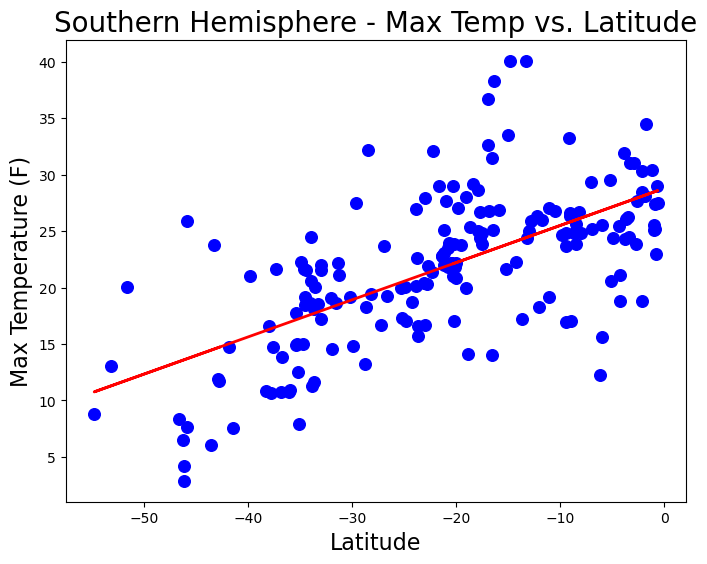

<Figure size 640x480 with 0 Axes>

In [19]:
# Linear regression on Southern Hemisphere
plt.figure(figsize=(8,6))
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq2 = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values,y_values, marker='o', color='blue', s=[70])
plt.plot(x_values,regress_values, 'red', linewidth=2)

plt.title('Southern Hemisphere - Max Temp vs. Latitude', fontsize=20)
plt.ylabel('Max Temperature (F)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq2,(-30, 50),fontsize=18, color='red')

print(f'The r-value is: {rvalue}')

plt.show()

plt.savefig('../output/Fig6.png')



**Discussion about the linear relationship:** My analysis is that weather gets warmer the closer you are to the equator.


## Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.23853179129394048


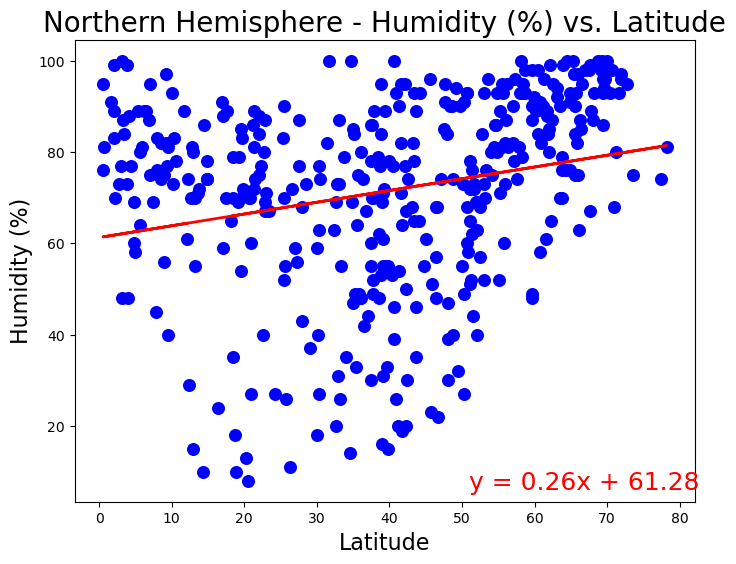

<Figure size 640x480 with 0 Axes>

In [20]:
# Northern Hemisphere
plt.figure(figsize=(8,6))
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values,y_values, marker='o', color='blue', s=[70])
plt.plot(x_values,regress_values,'red', linewidth=2)

plt.title('Northern Hemisphere - Humidity (%) vs. Latitude', fontsize=20)
plt.ylabel('Humidity (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(51,6),fontsize=18, color='red')

print(f'The r-value is: {rvalue}')

plt.show()

plt.savefig('../output/Fig7.png')


The r-value is: 0.016759316950056787


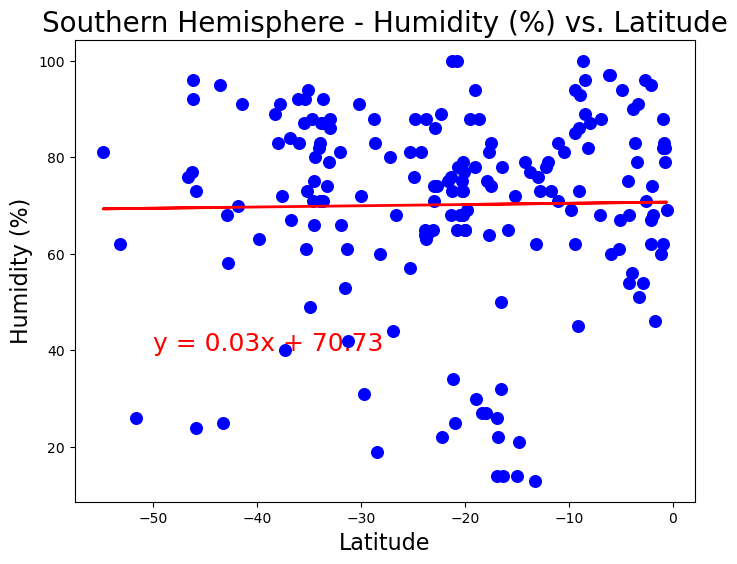

<Figure size 640x480 with 0 Axes>

In [21]:
# Southern Hemisphere
plt.figure(figsize=(8,6))
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values,y_values, marker='o', color='blue', s=[70])
plt.plot(x_values,regress_values,'red', linewidth=2)

plt.title('Southern Hemisphere - Humidity (%) vs. Latitude', fontsize=20)
plt.ylabel('Humidity (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(-50,40), fontsize=18, color='red')

print(f'The r-value is: {rvalue}')

plt.show()


plt.savefig('../output/Fig8.png')


**Discussion about the linear relationship:** Humidity increases the closer you get to the equater. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.15500489387697092


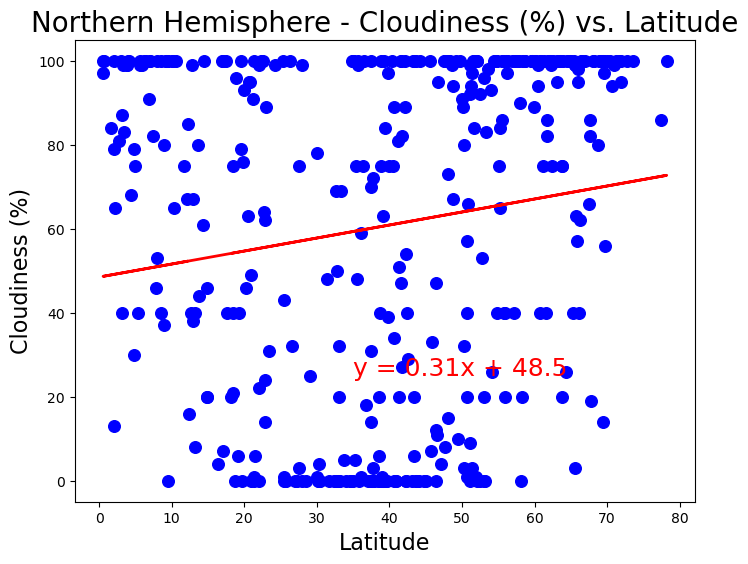

<Figure size 640x480 with 0 Axes>

In [22]:
# Northern Hemisphere

plt.figure(figsize=(8,6))
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values,y_values, marker='o', color='blue', s=[70])
plt.plot(x_values,regress_values,'red', linewidth=2)

plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude', fontsize=20)
plt.ylabel('Cloudiness (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(35,25), fontsize=18, color='red')

print(f'The r-value is: {rvalue}')


plt.show()

plt.savefig('../output/Fig9.png')

The r-value is: 0.14341322916643248


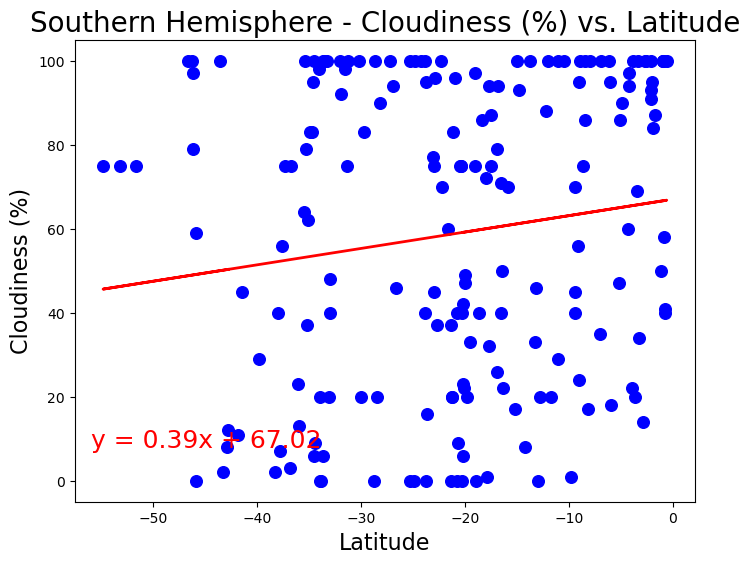

<Figure size 640x480 with 0 Axes>

In [23]:
# Southern Hemisphere

plt.figure(figsize=(8,6))
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values,y_values, marker='o', color='blue', s=[70])
plt.plot(x_values,regress_values,'red', linewidth=2)

plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude', fontsize=20)
plt.ylabel('Cloudiness (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(-56,8), fontsize=18, color='red')

print(f'The r-value is: {rvalue}')

plt.show()

plt.savefig('../output/Fig10.png')

**Discussion about the linear relationship:** Results are not strong enought to identify relationship. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.17434667290903336


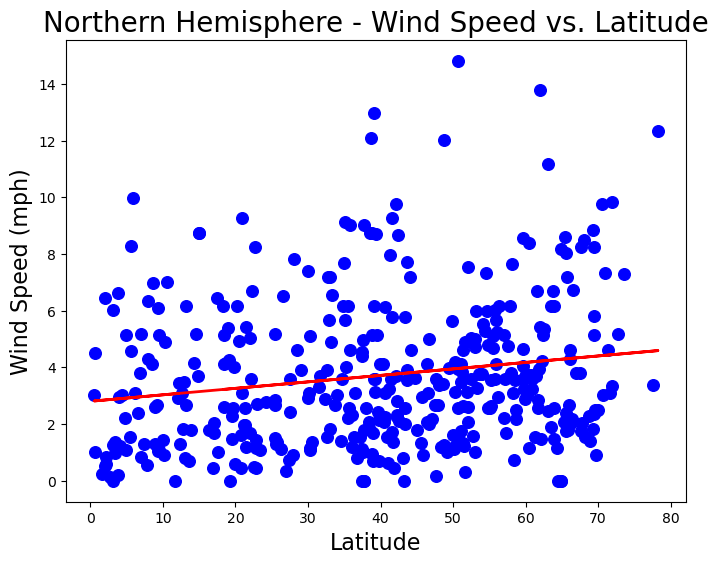

<Figure size 640x480 with 0 Axes>

In [24]:
# Northern Hemisphere
plt.figure(figsize=(8,6))
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values,y_values, marker='o', color='blue', s=[70])
plt.plot(x_values,regress_values,'red', linewidth=2)

plt.title('Northern Hemisphere - Wind Speed vs. Latitude', fontsize=20)
plt.ylabel('Wind Speed (mph)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(0,30), fontsize=18, color='red')

print(f'The r-value is: {rvalue}')

plt.show()

plt.savefig('../output/Fig11.png')

The r-squared is: -0.2494775354626458


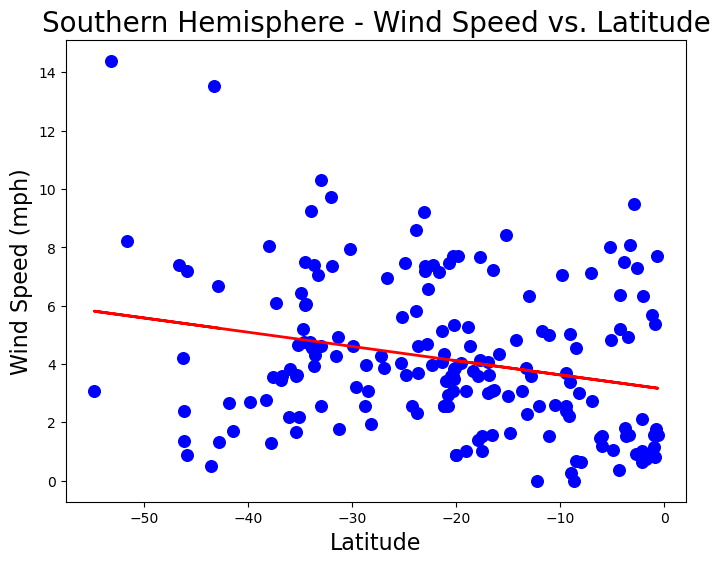

<Figure size 640x480 with 0 Axes>

In [25]:
# Southern Hemisphere

plt.figure(figsize=(8,6))
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values,y_values, marker='o', color='blue', s=[70])
plt.plot(x_values,regress_values,'red', linewidth=2)

plt.title('Southern Hemisphere - Wind Speed vs. Latitude', fontsize=20)
plt.ylabel('Wind Speed (mph)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(-19.5,21), fontsize=18, color='red')

print(f'The r-squared is: {rvalue}')

plt.show()

plt.savefig('../output/Fig12.png')

**Discussion about the linear relationship:** In the northern hemisphere there is a slight increase in wind the farther away from the equator you are and the southern hemishphere shows a decrease in windspeed the closer to the equator you are. 